# Домашнее задание: Учимся работе с данными - от загрузки до моделирования.

датасет: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

## 1. Скачайте датасет

In [55]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
data.head()
data = data.iloc[:, 1:-1] #удаляем id и unnamed 32
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [56]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

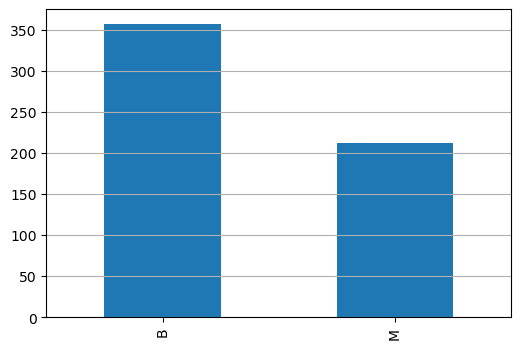

In [58]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [59]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

63/37 - `accuracy` не используем)

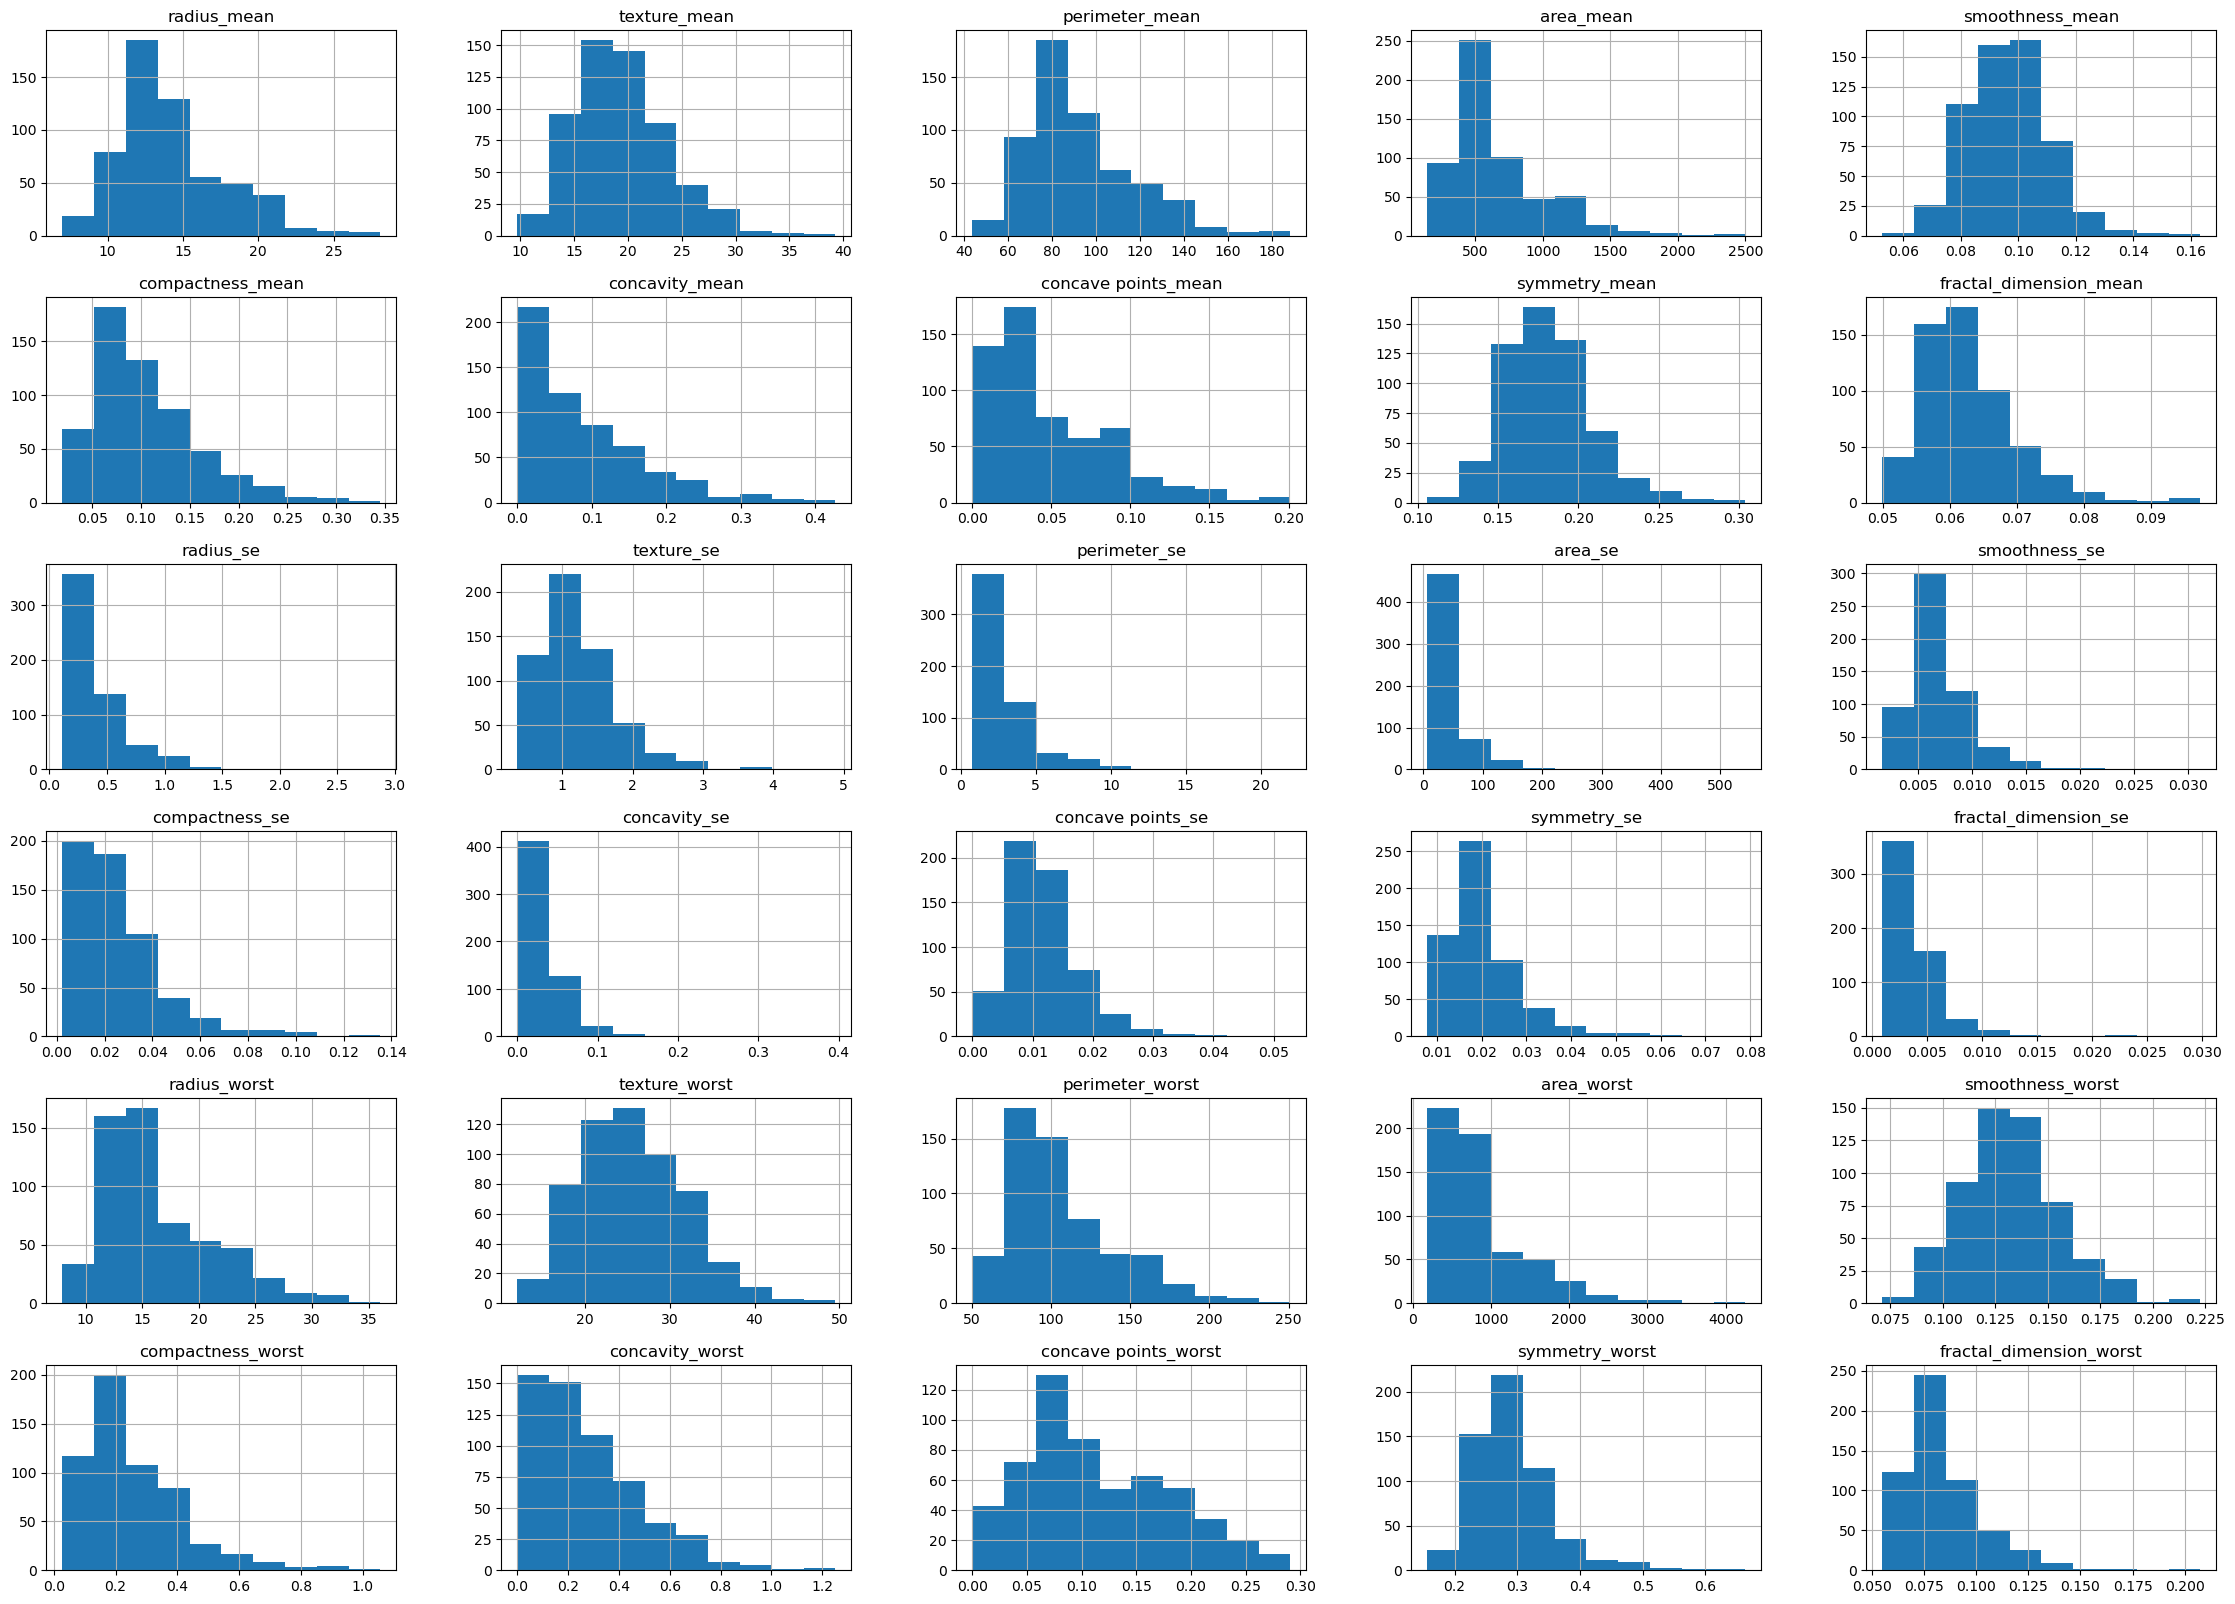

In [60]:
data.hist(figsize=(28, 20));

In [ ]:
sns.pairplot(data, hue='diagnosis');

## 4. Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

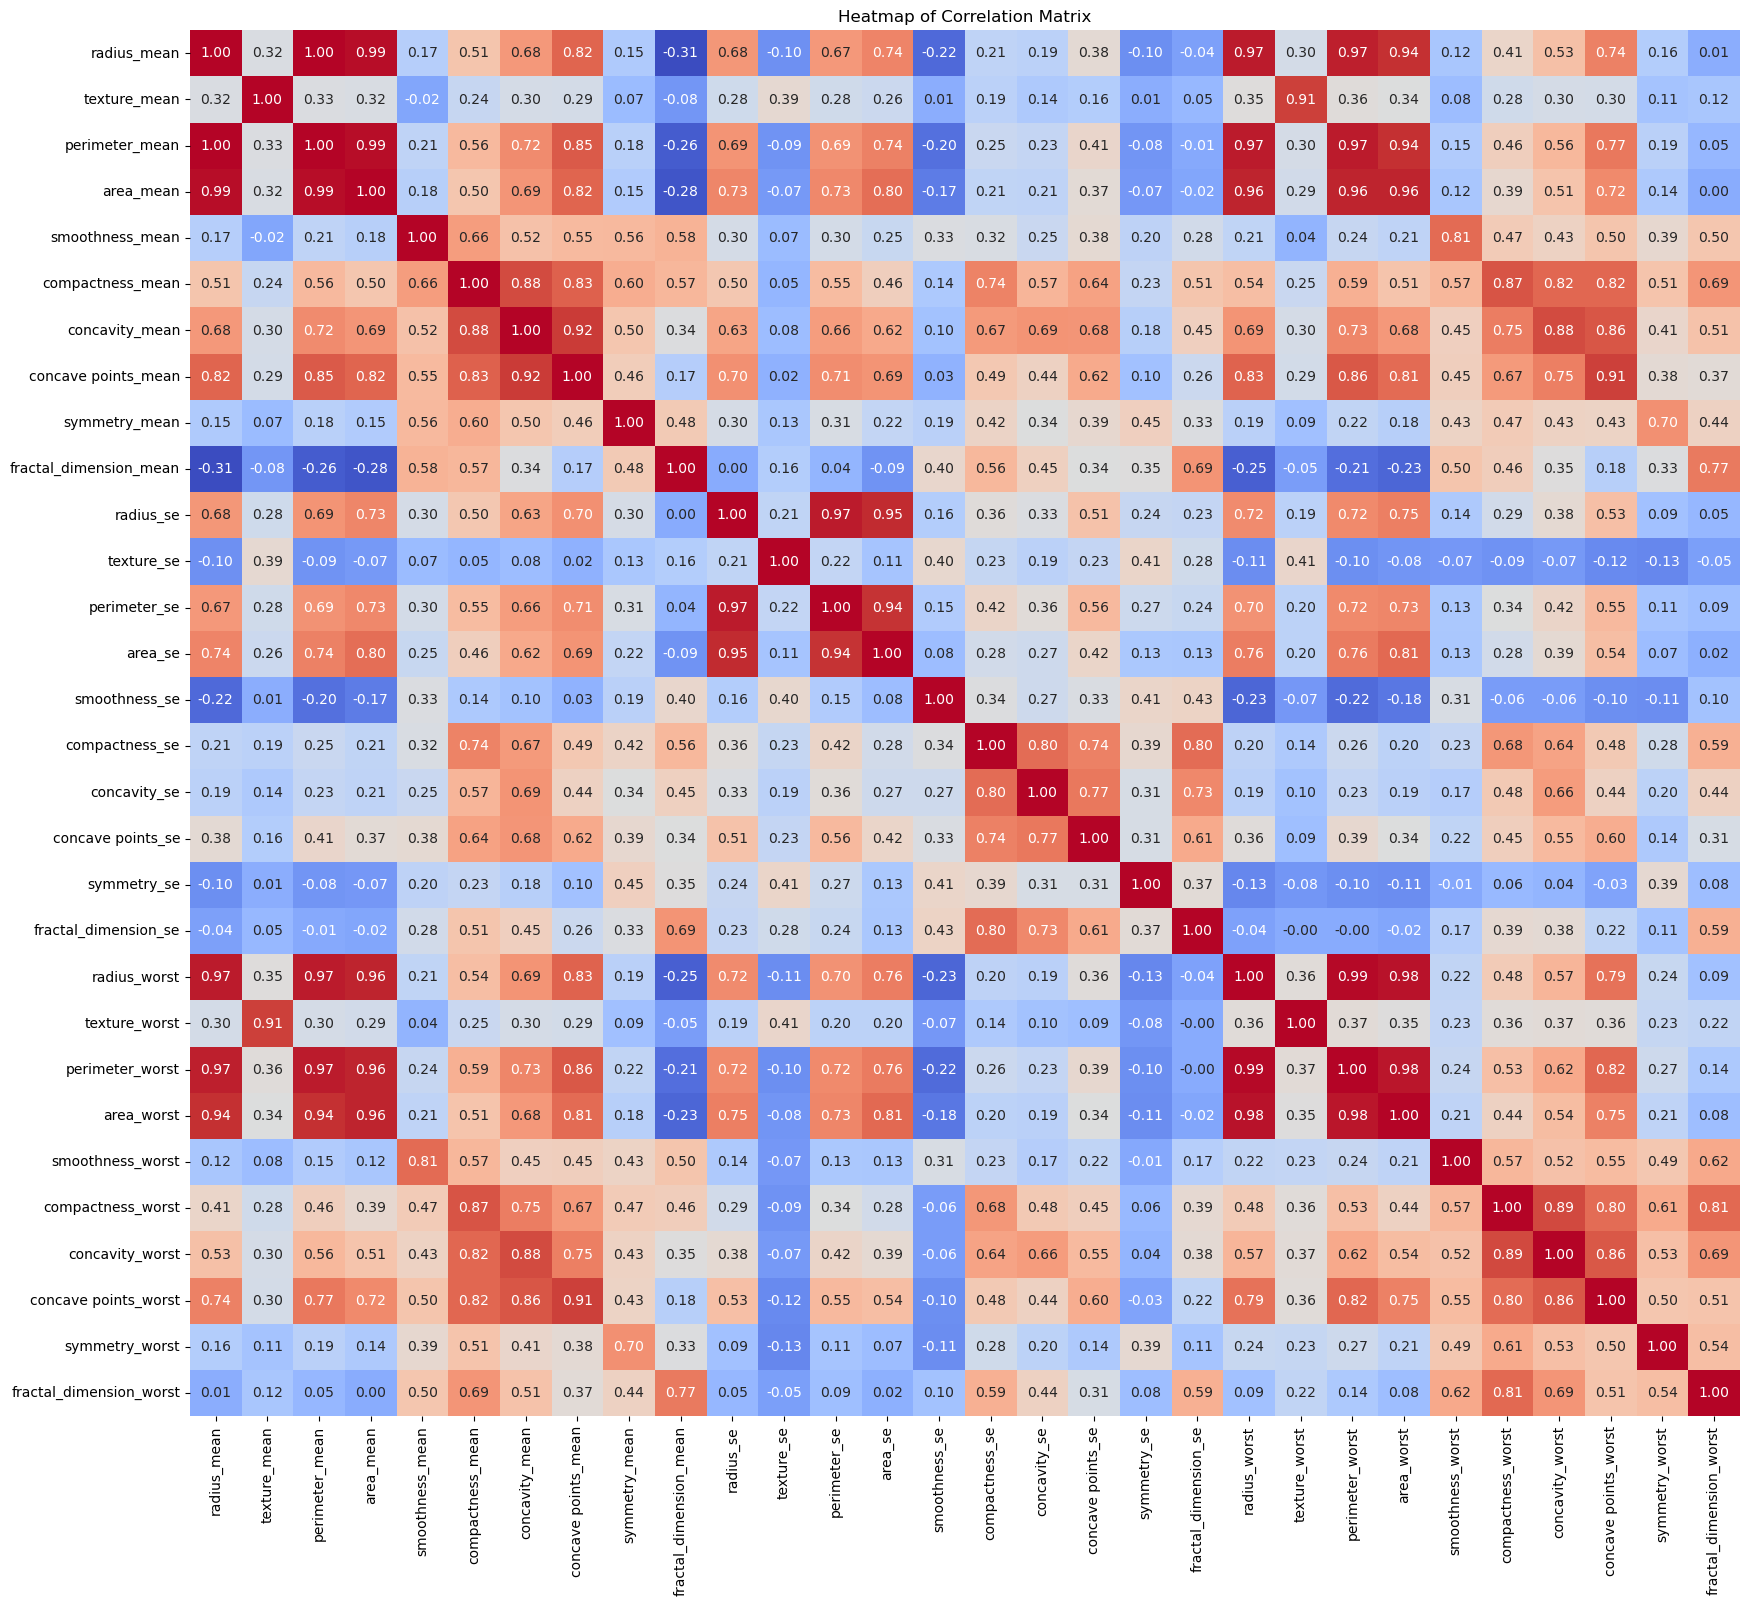

In [63]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.corr(), annot=True, cbar=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 5. Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

                level_0               level_1         0
3           radius_mean          radius_worst  0.969539
7          texture_mean         texture_worst  0.912045
8        perimeter_mean           radius_mean  0.997855
11       perimeter_mean          radius_worst  0.969476
12       perimeter_mean       perimeter_worst  0.970387
14            area_mean           radius_mean  0.987357
15            area_mean        perimeter_mean  0.986507
17            area_mean          radius_worst  0.962746
18            area_mean       perimeter_worst  0.959120
19            area_mean            area_worst  0.959213
24  concave points_mean        concavity_mean  0.921391
26  concave points_mean  concave points_worst  0.910155
33         perimeter_se             radius_se  0.972794
36              area_se             radius_se  0.951830
37              area_se          perimeter_se  0.937655
53      perimeter_worst           radius_mean  0.965137
56      perimeter_worst          radius_worst  0

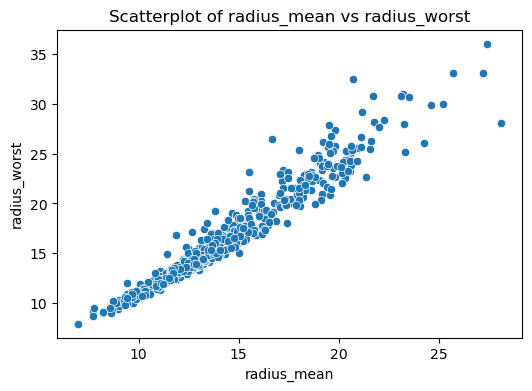

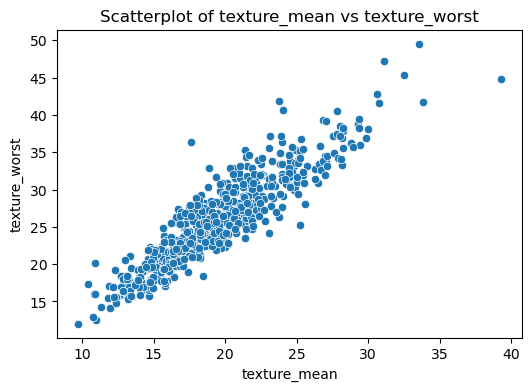

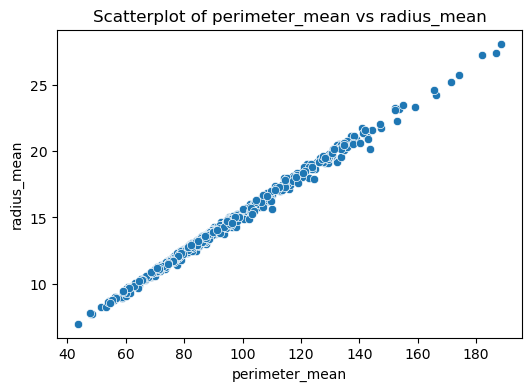

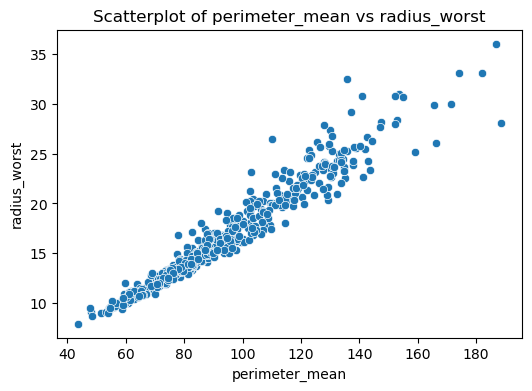

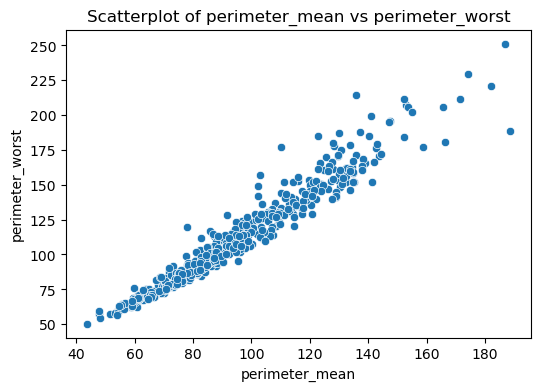

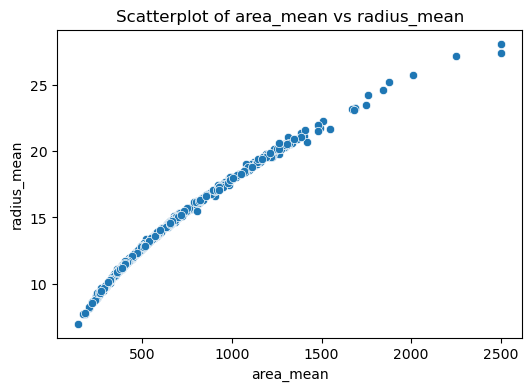

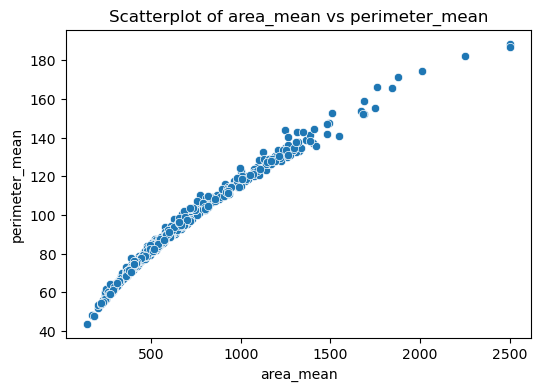

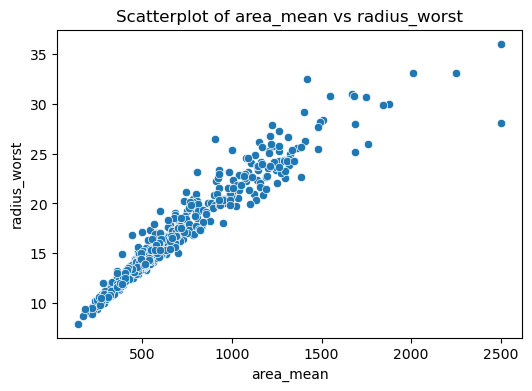

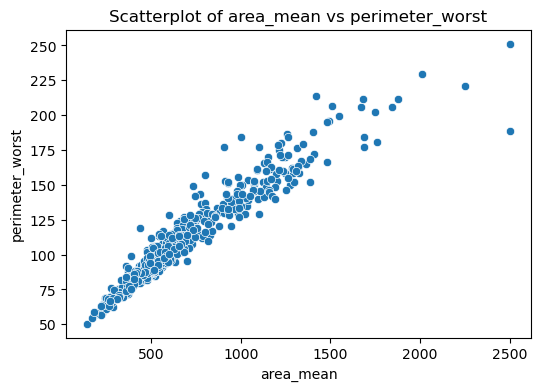

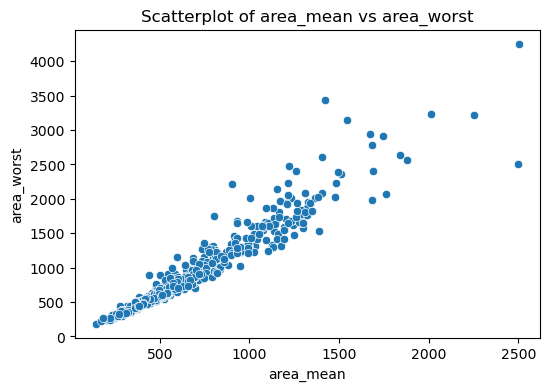

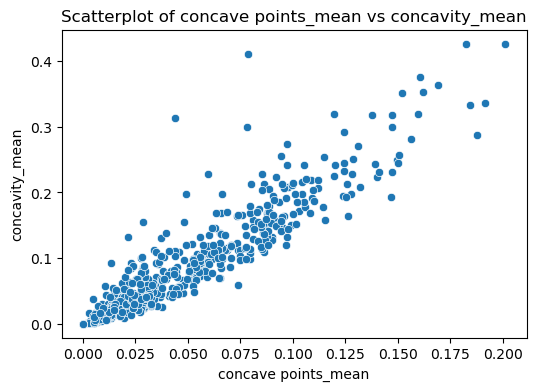

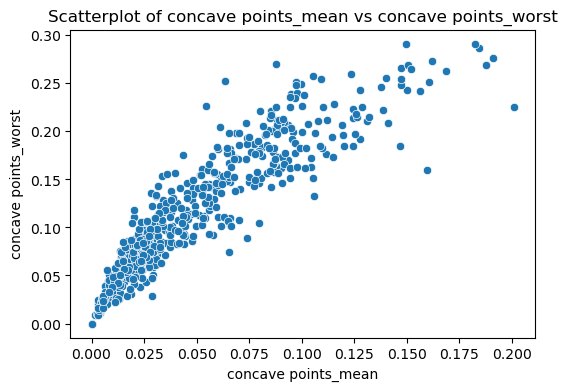

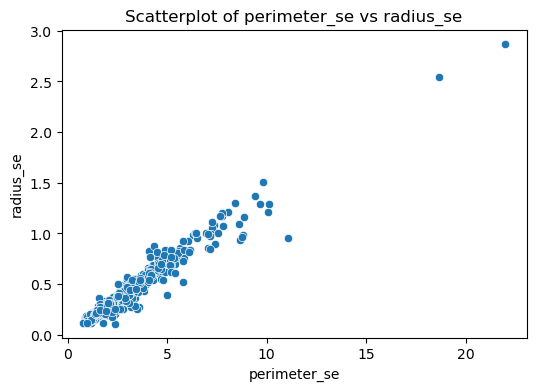

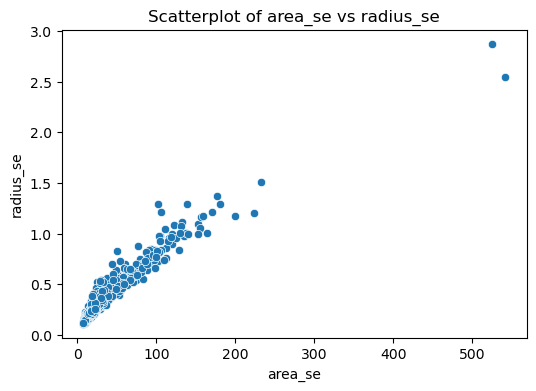

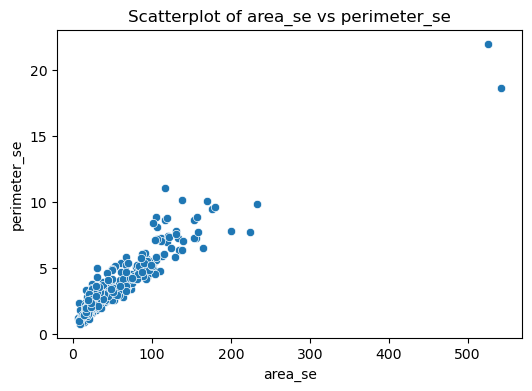

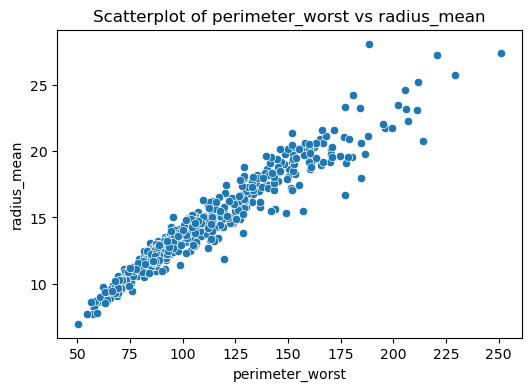

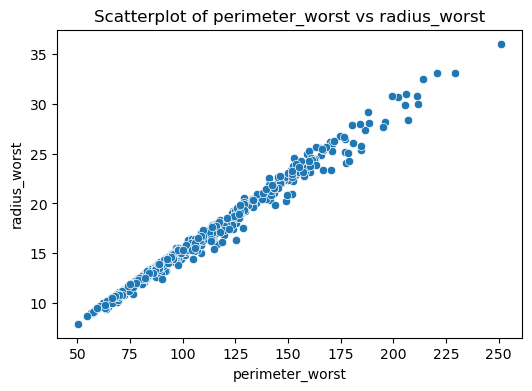

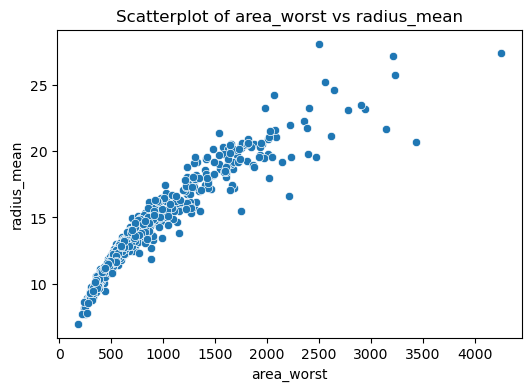

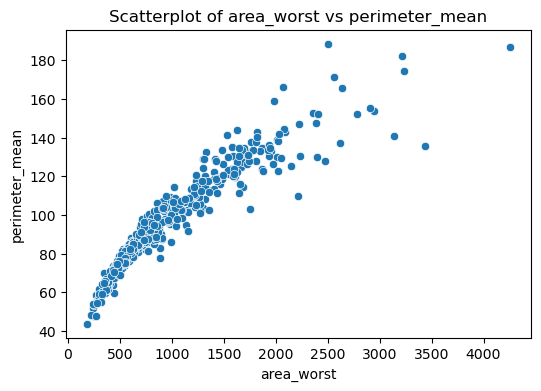

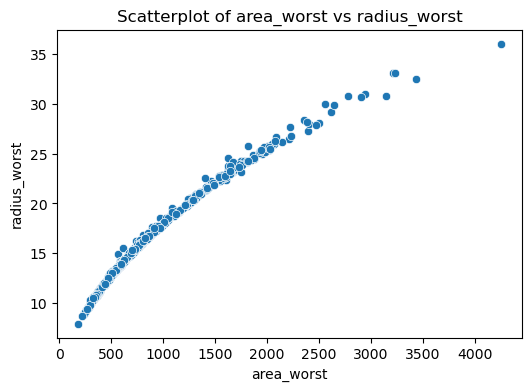

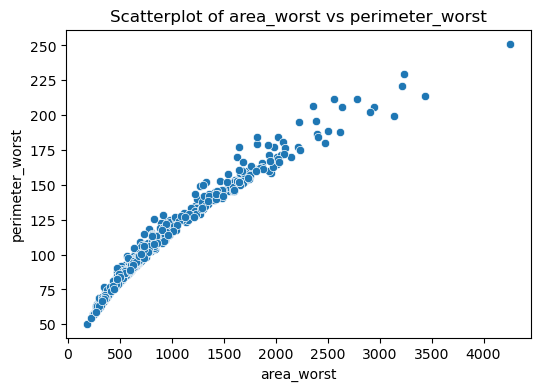

In [72]:
corr_matrix = data.corr()
strong_corrs = corr_matrix[corr_matrix.abs() > 0.9]
strong_corrs = strong_corrs.stack().reset_index()
strong_corrs = strong_corrs[strong_corrs['level_0'] < strong_corrs['level_1']]
#сильно скоррелированные признаки 
print(strong_corrs)
for index, row in strong_corrs.iterrows():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=row['level_0'], y=row['level_1'])
    plt.title(f"Scatterplot of {row['level_0']} vs {row['level_1']}")
    plt.show()

Да, линейная зависимость наблюдается, кроме пары concave points_mean  concave points_worst, там можно поставить под вопрос

## 6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

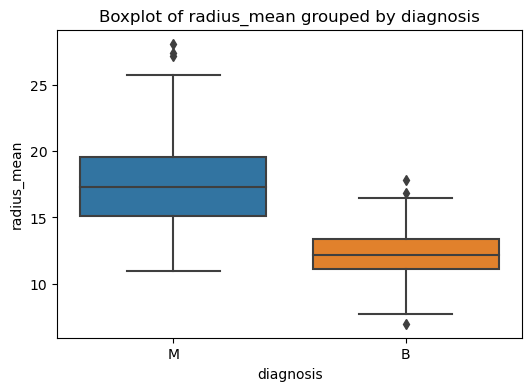

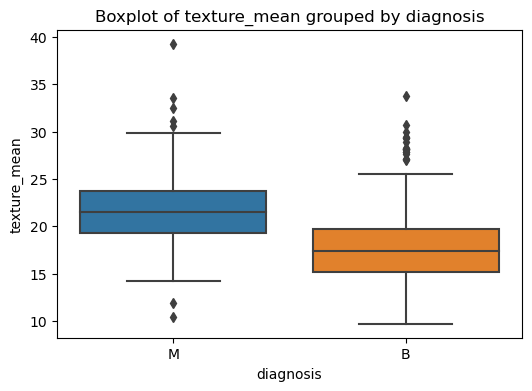

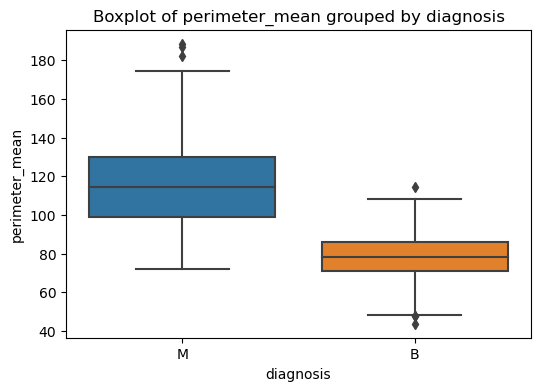

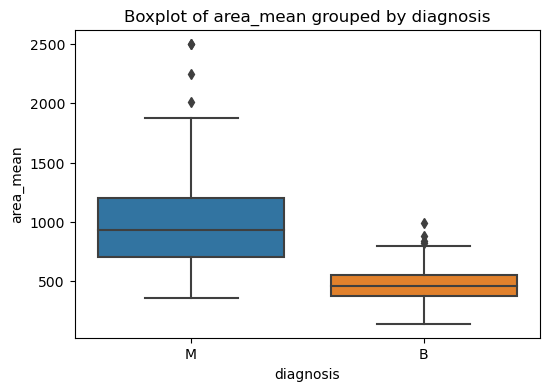

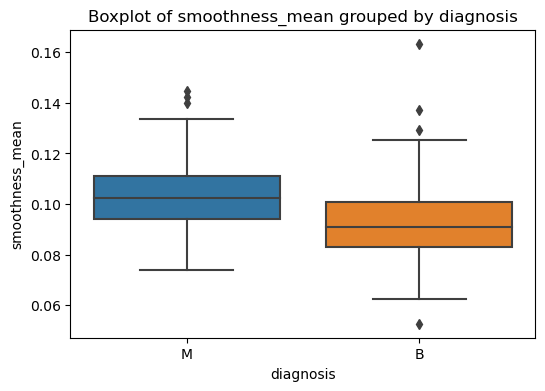

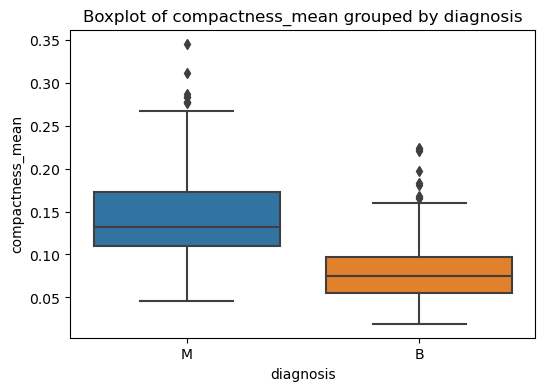

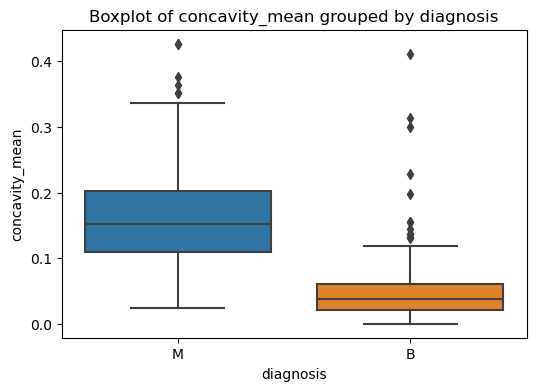

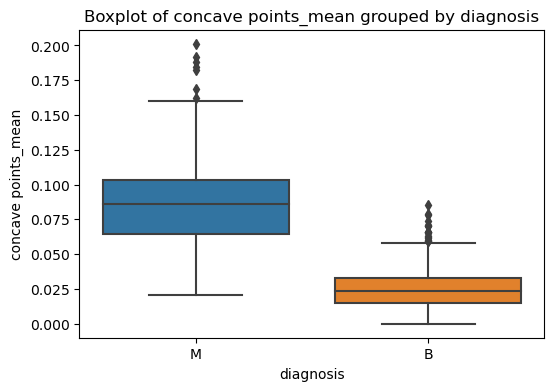

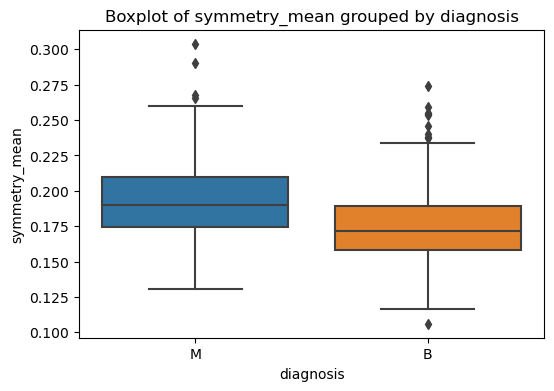

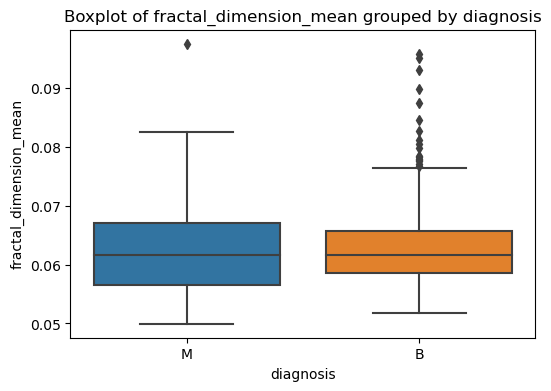

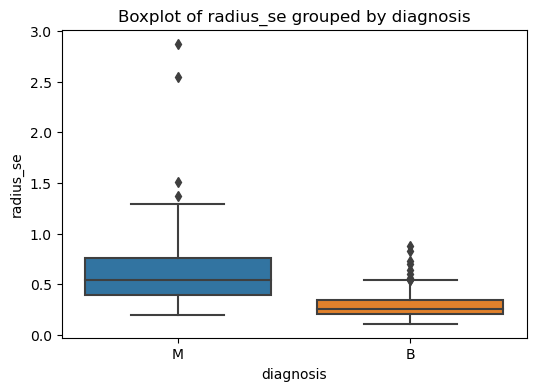

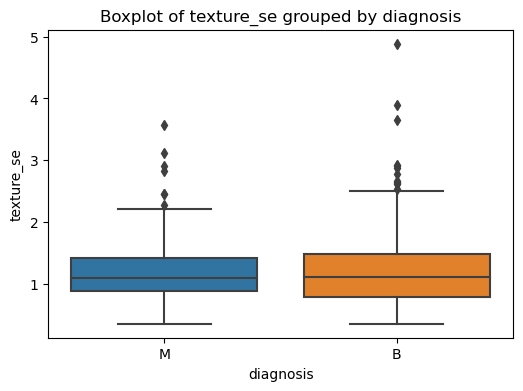

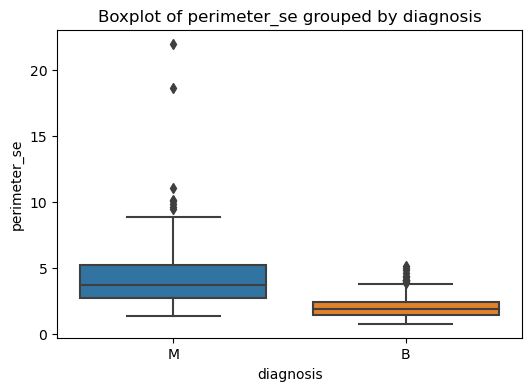

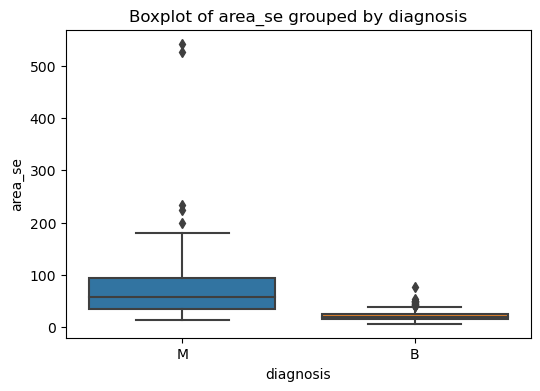

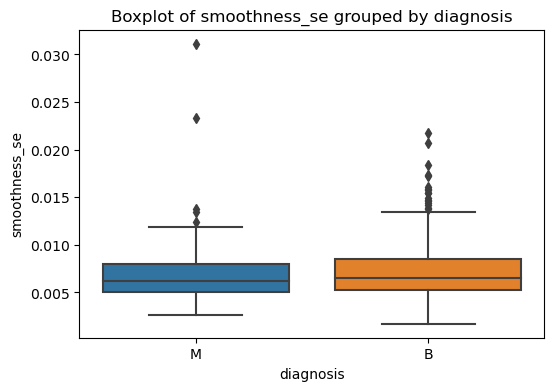

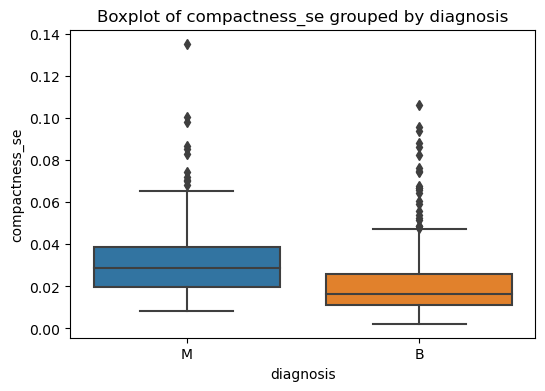

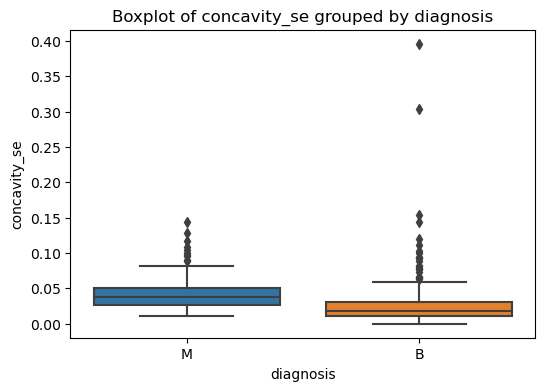

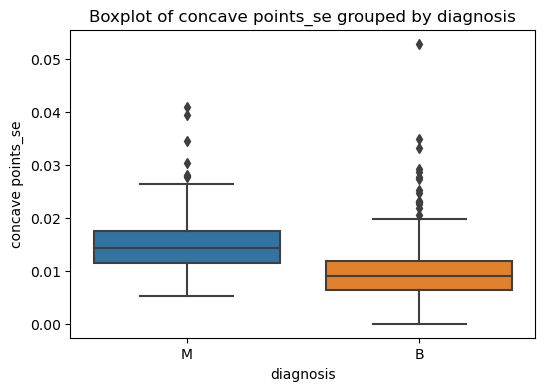

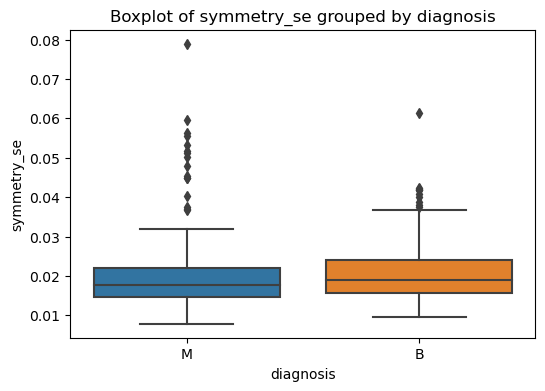

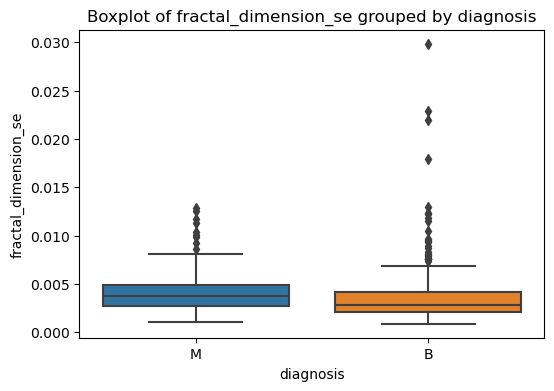

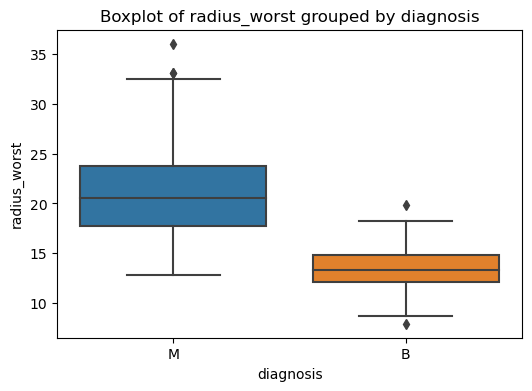

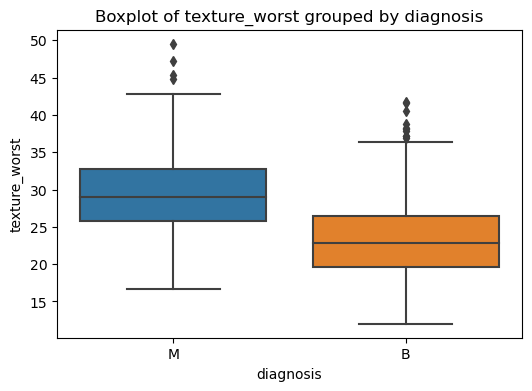

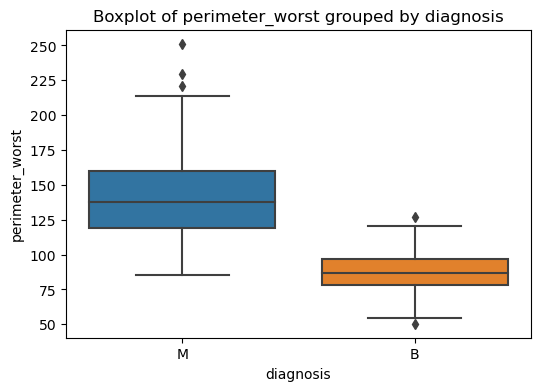

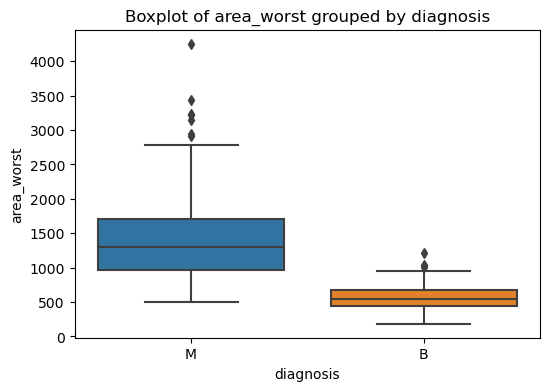

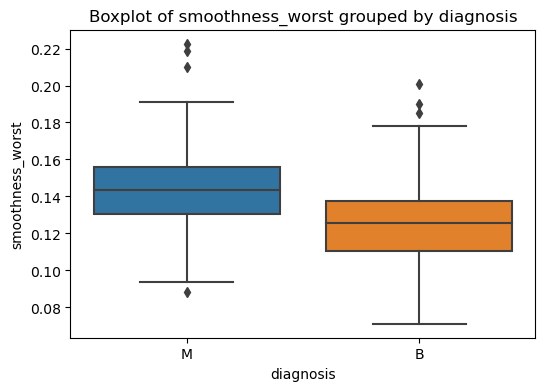

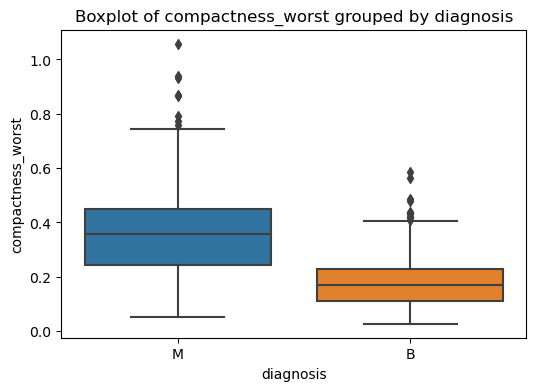

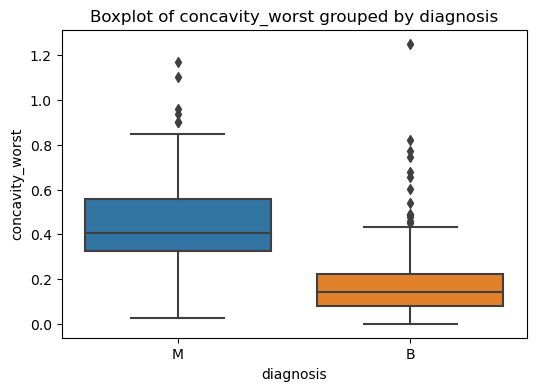

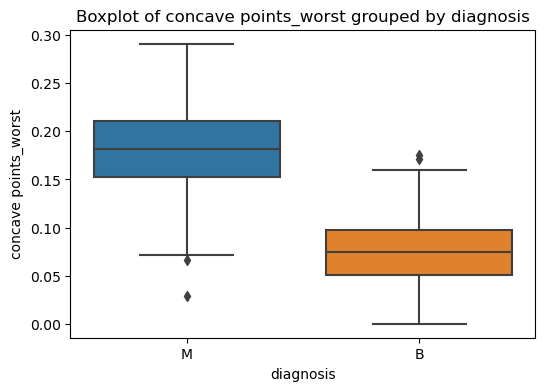

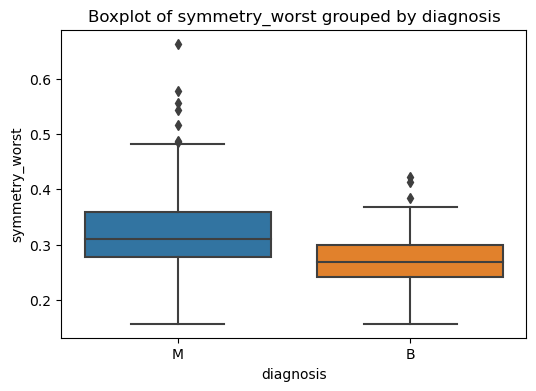

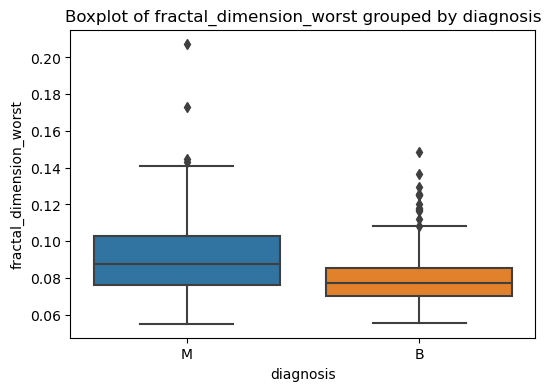

In [73]:
features = [col for col in data.columns if col != 'diagnosis']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'Boxplot of {feature} grouped by diagnosis')
    plt.show()

Предположительные признаки:
- один из radius_mean, perimeter_mean, area_mean
- compactness_mean
- один из concave points_mean,  concave points_worst
- один из radius_worst, perimeter_worst, area_worst
- concavity_worst

## Часть 2. Моделирование при помощи kNN
### Разбейте данные на train-test, отложив 30% выборки для тестирования.
### Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [74]:
#преобразование параметра диагноза в 1/0
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

Index(['diagnosis'], dtype='object')


In [75]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Train-test split

Используем параметр `stratify` из-за дисбаланса классов (63/37)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=69, stratify=data['diagnosis']
)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [84]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [85]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

#### Стандартизация нужна из-за того что значения параметров идут с разными порядками

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

In [93]:
from sklearn.neighbors import KNeighborsClassifier

#обучение
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

#прогноз
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

#оценка метрики качества
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Train metrics:')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'F1-score: {f1_score(y_train, y_train_pred)}')

print('Test metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision: {precision_score(y_test, y_test_pred)}')
print(f'Recall: {recall_score(y_test, y_test_pred)}')
print(f'F1-score: {f1_score(y_test, y_test_pred)}')

Train metrics:
Accuracy: 0.9723618090452262
Precision: 0.9858156028368794
Recall: 0.9391891891891891
F1-score: 0.9619377162629756
Test metrics:
Accuracy: 0.9766081871345029
Precision: 1.0
Recall: 0.9375
F1-score: 0.967741935483871


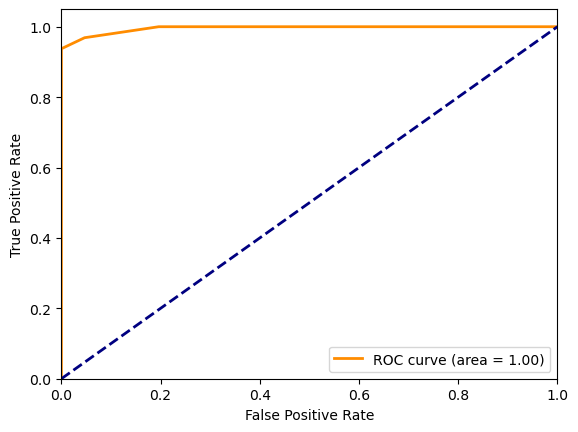

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score


y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)  # вычисление значений для ROC кривой
roc_auc = roc_auc_score(y_test, y_test_prob)  # вычисление площади под ROC кривой

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Получились довольно точные результаты для модели из коробки

## Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50), 'p': range(1, 4)},
             scoring='f1', verbose=1)

In [99]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'n_neighbors': 3, 'p': 1}
Best cross-validation score: 0.9513383693013948


Train metrics:
Accuracy: 0.9824120603015075
Precision: 0.993006993006993
Recall: 0.9594594594594594
F1-score: 0.9759450171821306
Test metrics:
Accuracy: 0.9766081871345029
Precision: 1.0
Recall: 0.9375
F1-score: 0.967741935483871


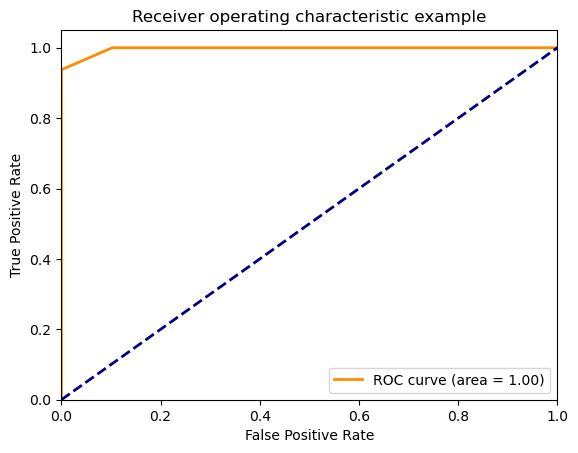

In [100]:
y_train_pred = grid_search.predict(X_train_scaled)
y_test_pred = grid_search.predict(X_test_scaled)

print('Train metrics:')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'F1-score: {f1_score(y_train, y_train_pred)}')

print('Test metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision: {precision_score(y_test, y_test_pred)}')
print(f'Recall: {recall_score(y_test, y_test_pred)}')
print(f'F1-score: {f1_score(y_test, y_test_pred)}')

y_test_prob = grid_search.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)  # вычисление значений для ROC кривой
roc_auc = roc_auc_score(y_test, y_test_prob)  # вычисление площади под ROC кривой

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

настройки числа соседей для kNN привела к небольшому улучшению метрик на обучающих данных

### Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:
Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.

In [101]:
corr_matrix = data.corr()
strong_corrs = corr_matrix[corr_matrix.abs() > 0.85]
strong_corrs = strong_corrs.stack().reset_index()
strong_corrs = strong_corrs[strong_corrs['level_0'] < strong_corrs['level_1']]
#сильно скоррелированные признаки 
print(strong_corrs)

                 level_0               level_1         0
4            radius_mean          radius_worst  0.969539
8           texture_mean         texture_worst  0.912045
9         perimeter_mean           radius_mean  0.997855
13        perimeter_mean          radius_worst  0.969476
14        perimeter_mean       perimeter_worst  0.970387
16             area_mean           radius_mean  0.987357
17             area_mean        perimeter_mean  0.986507
19             area_mean          radius_worst  0.962746
20             area_mean       perimeter_worst  0.959120
21             area_mean            area_worst  0.959213
24      compactness_mean        concavity_mean  0.883121
25      compactness_mean     compactness_worst  0.865809
29        concavity_mean       concavity_worst  0.884103
31   concave points_mean        perimeter_mean  0.850977
32   concave points_mean        concavity_mean  0.921391
34   concave points_mean       perimeter_worst  0.855923
35   concave points_mean  conca

In [132]:
#to_drop = strong_corrs[['level_0', 'level_1']].values.tolist()
#to_drop = [item for sublist in to_drop for item in sublist]
#to_drop = list(set(to_drop))
to_drop = strong_corrs['level_0'].tolist()
data_log = data.drop(columns=to_drop)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_log.drop(['diagnosis'], axis=1), data_log['diagnosis'], test_size=0.30, random_state=69, stratify=data_log['diagnosis']
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [134]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [135]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

In [136]:
print('Train metrics:')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'F1-score: {f1_score(y_train, y_train_pred)}')

print('Test metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision: {precision_score(y_test, y_test_pred)}')
print(f'Recall: {recall_score(y_test, y_test_pred)}')
print(f'F1-score: {f1_score(y_test, y_test_pred)}')

Train metrics:
Accuracy: 0.9824120603015075
Precision: 0.9862068965517241
Recall: 0.9662162162162162
F1-score: 0.9761092150170648
Test metrics:
Accuracy: 0.9941520467836257
Precision: 1.0
Recall: 0.984375
F1-score: 0.9921259842519685


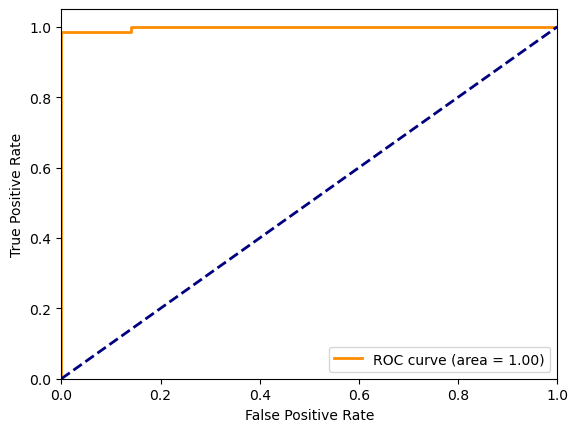

In [137]:
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob) 
roc_auc = roc_auc_score(y_test, y_test_prob) 

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

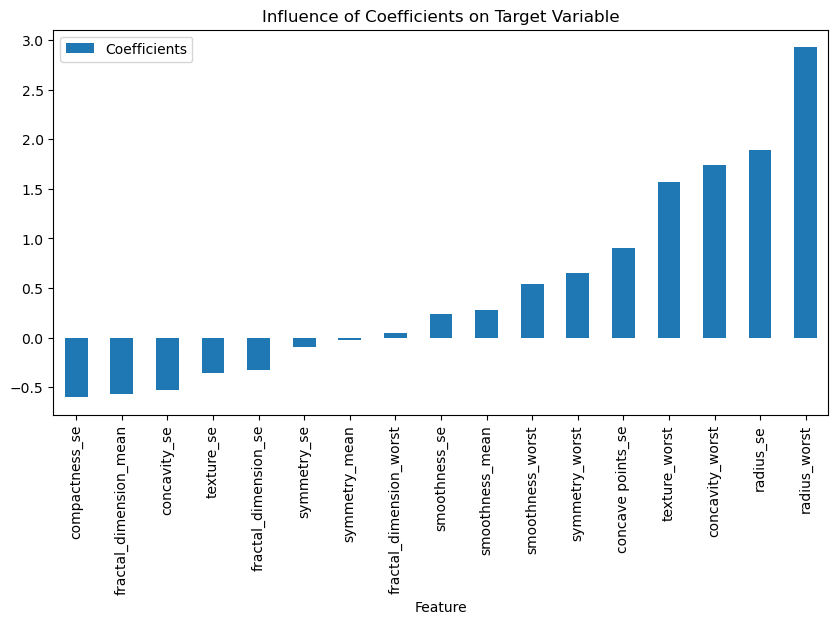

In [138]:
coefficients = pd.DataFrame({"Feature":data_log.columns[1:],"Coefficients":np.transpose(log_reg.coef_[0])})
coefficients = coefficients.sort_values(by='Coefficients')
coefficients.plot(x ='Feature', y='Coefficients', kind='bar', figsize=(10,5))
plt.title('Influence of Coefficients on Target Variable')
plt.show()

### Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную

In [161]:
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

Cs = np.logspace(-4, 4, 20)

log_reg_cv = LogisticRegressionCV(Cs=Cs, cv=5, random_state=69, max_iter=10000)
log_reg_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     cv=5, max_iter=10000, random_state=69)

In [162]:
y_train_pred = log_reg_cv.predict(X_train_scaled)
y_test_pred = log_reg_cv.predict(X_test_scaled)

In [163]:
print('Train metrics:')
print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Precision: {precision_score(y_train, y_train_pred)}')
print(f'Recall: {recall_score(y_train, y_train_pred)}')
print(f'F1-score: {f1_score(y_train, y_train_pred)}')

print('Test metrics:')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Precision: {precision_score(y_test, y_test_pred)}')
print(f'Recall: {recall_score(y_test, y_test_pred)}')
print(f'F1-score: {f1_score(y_test, y_test_pred)}')

Train metrics:
Accuracy: 0.9698492462311558
Precision: 0.9857142857142858
Recall: 0.9324324324324325
F1-score: 0.9583333333333333
Test metrics:
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.953125
F1-score: 0.976


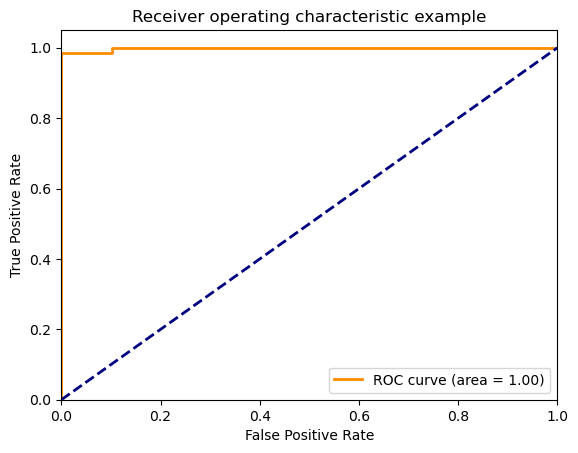

In [164]:
y_test_prob = log_reg_cv.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob) 
roc_auc = roc_auc_score(y_test, y_test_prob) 

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

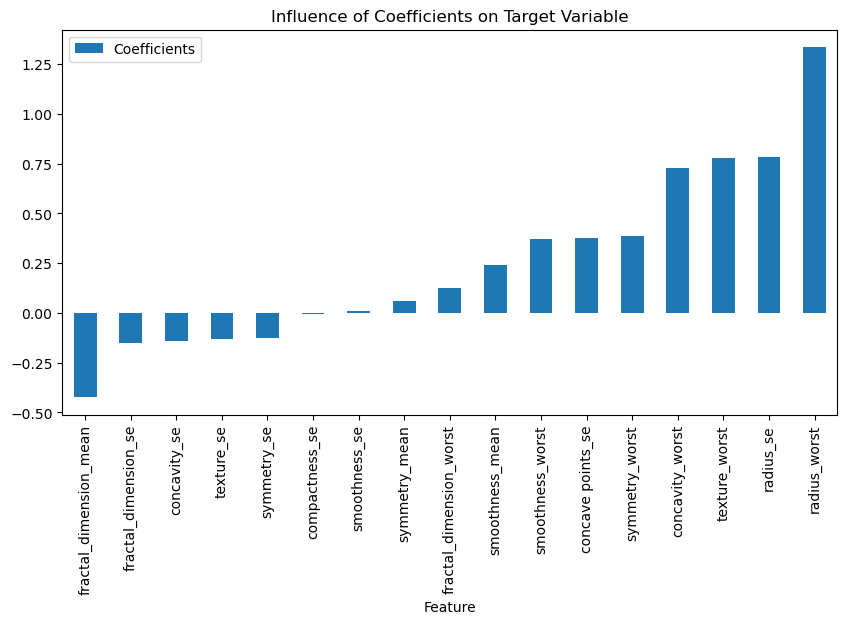

In [165]:
coefficients = pd.DataFrame({"Feature":data_log.columns[1:], "Coefficients":np.transpose(log_reg_cv.coef_[0])})
coefficients = coefficients.sort_values(by='Coefficients')
coefficients.plot(x ='Feature', y='Coefficients', kind='bar', figsize=(10,5))
plt.title('Influence of Coefficients on Target Variable')
plt.show()

KNN справился лучше